In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lista 1

## Uczenie maszynowe i sztuczna inteligencja

* [regresja](https://pl.wikipedia.org/wiki/Regresja_(statystyka))
* [podobieństwo konsinusowe](https://en.wikipedia.org/wiki/Cosine_similarity)

## Zadanie 1 (10pt)

Napisz wykorzystując regresję liniową program, który na podstawie oceny filmów przez użytkowników będzie
starał się przewidzieć ocenę innych użytkowników. Jako dane wykorzystamy zbiór
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie wybierzemy mniejszy zbiór, pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip").
Zadanie polega na wybraniu z pliku <em>ratings.csv</em> tych użytkowników ($\mbox{userId}$), którzy ocenili film
'Toy Story (1995)', który w tym pliku ma identyfikator '1' (patrz <em>movies.csv</em>).
W tym pliku osób takich jest $215$. Wtedy zgodnie z zapisem z wykładu
$x_{ij}$ będzie oceną $i$-tego użytkownika dla $i=0,\ldots, 214$, bo
taki jest nasz zbiór osób, które oceniły 'Toy Story' oraz $j$ będzie oceną $j$-tego filmu
dla $j=0,\ldots,m$. Jako $j$ można wybrać $\mbox{movieId}$ filmu, czyli
np. film o $\mbox{movieId}=42$ oceniony przez użytkownika $5$ (nie jest to $\mbox{userId}$, tylko
piąta osoba ze zbioru $215$ osób), który ocenił film jako np. $3.5$ wpisujemy $x[5, 42] = 3.5$.
Natomiast $y_i$ to ocena 'Toy Story' przez $i$-tego użytkownika. Zatem tworzymy macierz $X = [x_{ij}]$ oraz wektor $y_i$
gdzie $i=0,\ldots,215$ oraz $j=0,\ldots,m$. Dla tak przygotowanych danych wykonujemy:

* regresje liniową na całym zbiorze użytkowników dla $m=10,1000,10000$,
  czyli np. dla $m=10$ ignorujemy filmy o $\mbox{movieId} \gt 10$ i robimy regresje
  dla tak okrojonego zbioru ocen. Jakie dostajemy błędy. Pokaż na wykresie.
* podziel zbiór osób na tzw. zbiór treningowy oraz zbiór testowy np.
  weźmy $i=0,\ldots,200$ to będzie zbiór treningowy i na takim zbiorze osób wykonajmy regresje
  natomiast później sprawdzamy już dla całości ($215$). Zatem ostatnie
  $15$ ocen będziemy chcieli przewidzieć (zbiór testowy). Zrób przewidywanie dla
  $m=10,100,200,500,1000,10000$. Wyświetl wynik predykcji i wynik prawidłowy
  dla tych $15$ osób.

Przykład danych do regresji jakie otrzymujemy dla $m=10$ i $n=215$.

```
X = [[0.  4.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [3.  0.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [3.  3.  0.  0.  0.  2.  0.  0.  2.  0. ]
     [3.5 0.  0.  0.  0.  0.  0.  0.  5.  0. ]
     ...
y = [[4. ]
     [4. ]
     [4.5]
     [2.5]
     [4.5]
     [3.5]
     [4. ]
     [3.5]
     ...
```


In [59]:
import pandas as pd

films = pd.read_csv("/content/drive/MyDrive/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/ratings.csv")
toy_story_ratings = ratings[ratings['movieId'] == 1]
toy_story_user_ids = toy_story_ratings['userId'].tolist()
selected_ratings = ratings[ratings['userId'].isin(toy_story_user_ids)]

X = selected_ratings[selected_ratings['movieId'] != 1].pivot(index='userId', columns='movieId', values='rating').fillna(0)
X_all = ratings[ratings['movieId'] != 1].pivot(index='userId', columns='movieId', values='rating').fillna(0)

y = selected_ratings[selected_ratings['movieId'] == 1].set_index('userId')['rating']

X

movieId,2,3,4,5,6,7,8,9,10,11,...,187031,187541,187593,187595,187717,188189,188301,188797,189713,190183
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y.to_frame()

,rating
userId,
1,4.0
5,4.0
7,4.5
15,2.5
17,4.5
...,...
606,2.5
607,4.0
608,2.5


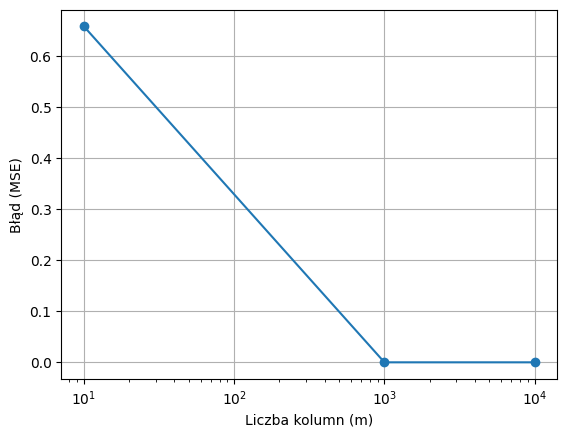

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

m_values = [10, 1000, 10000]
errors = []

for m in m_values:
    first_movies = X.columns[:m]
    X_subset = X[first_movies]

    X_all_subset = X_all[first_movies]
    model = LinearRegression()
    model.fit(X_subset, y)
    y_pred = model.predict(X_all_subset)
    y_pred_selected = y_pred[X_all_subset.index.isin(toy_story_user_ids)]

    error = mean_squared_error(y, y_pred_selected)
    errors.append(error)

plt.plot(m_values, errors, marker='o')
plt.xlabel('Liczba kolumn (m)')
plt.ylabel('Błąd (MSE)')
plt.xscale("log")
plt.grid(True)
plt.show()


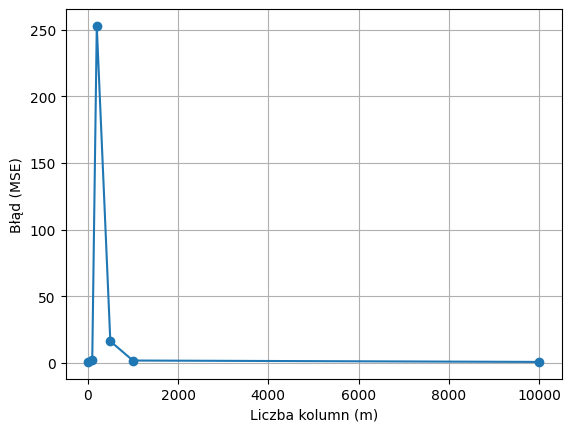

,rating,Predykcje dla m=10:,Predykcje dla m=100:,Predykcje dla m=200:,Predykcje dla m=500:,Predykcje dla m=1000:,Predykcje dla m=10000:
userId,,,,,,,
587,5.0,3.921403,4.881619,2.070188,7.595844,5.218069,4.832615
590,4.0,4.109299,4.606372,3.531198,4.935781,5.962613,4.774418
596,4.0,3.854351,4.787752,5.441853,4.423478,5.057986,4.740054
597,4.0,3.923053,2.382483,5.919953,-3.806730,2.850540,3.235937
599,3.0,4.049328,3.734382,-13.565050,2.569665,4.609292,3.511539
600,2.5,4.808877,3.951790,-4.903929,4.443696,3.092148,3.517191
601,4.0,3.854351,3.814743,3.672232,5.235807,5.220349,4.359672
603,4.0,3.691427,2.443351,-45.756929,2.895229,2.987946,3.257143
604,3.0,4.001825,7.010179,-13.158661,-3.231301,4.662875,4.381429


In [65]:
train_size = 200
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

m_values = [10, 100, 200, 500, 1000, 10000]

predictions = {}
errors = []

for m in m_values:
    first_movies1 = X_train.columns[:m]
    X_train_subset = X_train[first_movies1]
    X_test_subset = X_test[first_movies1]

    model1 = LinearRegression()
    model1.fit(X_train_subset, y_train)
    y_pred1 = model1.predict(X_test_subset)
    predictions[m] = y_pred1
    error = mean_squared_error(y_test, y_pred1)
    errors.append(error)


plt.plot(m_values, errors, marker='o')
plt.xlabel('Liczba kolumn (m)')
plt.ylabel('Błąd (MSE)')
plt.grid(True)
plt.show()

y_data = y_test.to_frame()
for m, y_pred in predictions.items():
    y_data[f"Predykcje dla m={m}:"] =  y_pred

y_data


In [66]:
y_data.corr()


,rating,Predykcje dla m=10:,Predykcje dla m=100:,Predykcje dla m=200:,Predykcje dla m=500:,Predykcje dla m=1000:,Predykcje dla m=10000:
rating,1.000000,-0.562978,-0.126046,-0.161556,0.066572,0.324626,0.557204
Predykcje dla m=10:,-0.562978,1.000000,0.142585,0.091916,-0.112057,-0.009464,0.014749
Predykcje dla m=100:,-0.126046,0.142585,1.000000,0.081628,-0.061200,0.514197,0.430589
Predykcje dla m=200:,-0.161556,0.091916,0.081628,1.000000,0.410189,0.046038,-0.210770
Predykcje dla m=500:,0.066572,-0.112057,-0.061200,0.410189,1.000000,0.008439,-0.274223
Predykcje dla m=1000:,0.324626,-0.009464,0.514197,0.046038,0.008439,1.000000,0.835227
Predykcje dla m=10000:,0.557204,0.014749,0.430589,-0.210770,-0.274223,0.835227,1.000000


## Zadanie 2 (15pt)

Napisz system rekomendacji filmów. Systemy takie są wykorzystywane przez różne firmy np.
Netflix organizował konkurs na opracowanie algorytmu, który będzie przewidywał
ocenę użytkownika [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize).
W zadaniu tym zaimplementujemy podobny system, który jednak zamiast przewidywania będzie na
podstawie preferencji użytkownika rekomendował filmy, które najprawdopodobniej mu się spodobają.
Istnieje wiele sposobów, aby taki system napisać, dla zainteresowanych bardziej tematem proponuje
zobaczyć np. [Recommendation Systems](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf).
W tym zadaniu wybierzemy w miarę prosty i łatwy do implementacji system rekomendacji.
Sformalizujmy problem. Załóżmy, że mamy macierz oceny, gdzie wiersze będą reprezentować
użytkowników a kolumny filmy np.
$$ \begin{array}{ccc}
    & \mbox{Matrix} & \mbox{Star Wars IV} \\
    \mbox{Alice} & 5 & 4 \\
    \mbox{Bob} & 0 & 1 \\
    \mbox{John} & 2 & 2 \\
    \mbox{Ada} & 5 & 5
   \end{array}$$
Patrząc na powyższą macierz widać, że kolumny pierwsza i druga mają podobne oceny stąd można wywnioskować, że
filmy Matrix i Star Wars IV są (według użytkowników) podobne do siebie, czyli jeśli komuś podobał się Matrix
to jest duża szansa, że będzie podobał mu się Star Wars i odwrotnie. Dlatego "podobieństwo" sformalizujemy przez wykorzystanie
[podobieństwa cosinusowego](https://en.wikipedia.org/wiki/Cosine_similarity), czyli
jeśli $x = (x_1, x_2, \dots, x_n)$ i $y = (y_1, y_2, \dots, y_n)$, wtedy:
$$x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = x \cdot y = \lVert x \rVert \lVert y \rVert \cos(\theta)$$
Gdzie $\theta$ jest kątem między wektorami. Wygodniej będzie nam normalizować wektory. Wtedy
$$x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = \cos(\theta).$$ Wtedy $\cos(\theta)$ reprezentuje
podobieństwo jednego wektora do drugiego, czyli jak bardzo jedne oceny są bliskie innym.

Dla naszej macierzy otrzymujemy

In [ ]:
import numpy as np

In [ ]:
x = np.array([[5,0,2,5], [4,1,2,5]]).T
x

array([[5, 4],
       [0, 1],
       [2, 2],
       [5, 5]])

Obliczamy normę wektorów kolumnowych

In [ ]:
np.linalg.norm(x, axis=0)

array([7.34846923, 6.78232998])

Obliczamy znormalizowaną macierz

In [ ]:
x/np.linalg.norm(x, axis=0)

array([[0.68041382, 0.58976782],
       [0.        , 0.14744196],
       [0.27216553, 0.29488391],
       [0.68041382, 0.73720978]])

Nasza własna ocena filmów Matrix - 4, Star Wars IV - 3 dla wygody zapisujemy jako wektor kolumnowy

In [ ]:
y = [[4],[3]]
y

[[4], [3]]

Obliczamy podobieństwo cosinusowe z każdym użytkownikiem (skorzystamy z mnożenia macierzowego)

In [ ]:
z=np.dot(x/np.linalg.norm(x, axis=0), np.array(y)/np.linalg.norm(y))
z

array([[0.89819175],
       [0.08846517],
       [0.39466277],
       [0.98665692]])

Normalizujemy otrzymany wektor (będzie on reprezentował nasz profil filmowy)

In [ ]:
z/np.linalg.norm(z)

array([[0.64422929],
       [0.06345177],
       [0.28307243],
       [0.70768107]])

Teraz musimy obliczyć podobieństwo cosinusowe między naszym profilem a każdą kolumną macierzy, aby znaleźć takie filmy, które są podobne do naszego profilu. Sortujemy po otrzymanym podobieństwu i dostajemy rekomendacje. Wykorzystując nasz przykład, otrzymujemy


In [ ]:
X = x/np.linalg.norm(x, axis=0)
Z = z/np.linalg.norm(z)
np.dot(X.T, Z)

array([[0.99690104],
       [0.99448407]])

Stąd dostaliśmy większą rekomendacje dla filmu Matrix (0.996) niż Star Wars IV (0.994). Co było oczywiście oczekiwane
skoro nasza ocena była Matrix - 4, a Star Wars IV - 3.

Możemy, teraz przejść do właściwej części zadania.

### Zadanie do wykoniania

Napisz system rekomendacji filmów który będzie wykorzystywał dane
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie mniejszy zbiór (który dodatkowo trochę jeszcze zmniejszymy). Pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip).
Interesować, będą nas głównie dwa pliki movies.csv oraz ratings.csv. W pliku ratings.csv mamy
właściwie wszystkie dane, które będą nam potrzebne aby stworzyć macierz oceny. Ponieważ
nawet w tym przypadku otrzymana macierz będzie dość duża dlatego w trakcie wczytywania
danych z pliku proszę wziąć pod uwagę tylko te wiersze (z pliku ratings.csv) w których <b>movie_id</b> (druga kolumna)
jest mniejsze od 10000 (resztę ignorujemy). Dla aktualnych danych ze strony otrzymamy, wtedy macierz mniej więcej 611x9019.
Przykładowy wynik dla wybranego profilu filmowego:

```
# wektor my_ratings odpowiada wektorowi y z przykładu wyżej
my_ratings = np.zeros((9019,1))
my_ratings[2571] = 5      # patrz movies.csv  2571 - Matrix
my_ratings[32] = 4        # 32 - Twelve Monkeys
my_ratings[260] = 5       # 260 - Star Wars IV
my_ratings[1097] = 4
my_ratings_norm = my_ratings/np.linalg.norm(my_ratings)

...

# otrzymujemy wynik rekomendacji po posortowaniu
# (cos(θ), movies_id)
(0.8675507828468105, 260)
(0.8362098349303669, 2571)
(0.8227451213877744, 1196)
(0.8002349214247857, 1210)
(0.7458504689612442, 1097)
(0.7286029159733108, 32)
(0.7265369898748615, 1198)
(0.7095672455110477, 1240)
(0.7029872178855614, 1270)
```

Otrzymane reprezentacje wyświetl w postaci nazw filmów, korzystając z movies.csv. Uwaga: w rzeczywistych
danych otrzymamy dużą liczbę zer, nawet całe kolumny, wtedy dostaniemy wartości NaN przy dzieleniu!
Rozwiąż ten problem wykorzystując np.nan_to_num(...).



In [126]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os

ratings_df = pd.read_csv("/content/drive/MyDrive/ratings.csv")
movies_df = pd.read_csv("/content/drive/MyDrive/movies.csv")


movies_df = movies_df[movies_df['movieId'] < 10000]

ratings_df = ratings_df[ratings_df['movieId'] < 10000]


In [134]:
ratings_matrix = np.zeros((ratings_df['userId'].max()+1, ratings_df['movieId'].max()+1))

for index, row in ratings_df.iterrows():
  ratings_matrix[int(row['userId'])][int(row['movieId'])] = row['rating']

my_ratings = np.zeros((ratings_df['movieId'].max()+1, 1))
my_ratings[2571] = 5      # Matrix
my_ratings[32] = 4        # Twelve Monkeys
my_ratings[260] = 5       # Star Wars IV
my_ratings[1097] = 4      # E.T. the Extra-Terrestrial

column_norms = np.linalg.norm(ratings_matrix, axis=0)

normalized_matrix = np.nan_to_num(ratings_matrix / column_norms)

my_ratings_norm = np.nan_to_num(my_ratings / np.linalg.norm(my_ratings))

user_similarity_scores = np.dot(normalized_matrix, my_ratings_norm)

normalized_user_similarity_scores = np.nan_to_num(user_similarity_scores / np.linalg.norm(user_similarity_scores))

recommendations = np.dot(normalized_matrix.T, normalized_user_similarity_scores)

sorted_rec = [(x, y[0]) for x, y in enumerate(recommendations.tolist())]
sorted_rec.sort(reverse=True, key=lambda x:x[1])

movie_dict = movies_df.set_index('movieId')['title'].to_dict()

for x, y in sorted_rec[:100]:
  print(movie_dict[x],'|', x, '|', y)

Star Wars: Episode IV - A New Hope (1977) | 260 | 0.8675507828468105
Matrix, The (1999) | 2571 | 0.8362098349303669
Star Wars: Episode V - The Empire Strikes Back (1980) | 1196 | 0.8227451213877744
Star Wars: Episode VI - Return of the Jedi (1983) | 1210 | 0.8002349214247857
E.T. the Extra-Terrestrial (1982) | 1097 | 0.7458504689612442
Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | 32 | 0.7286029159733108
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) | 1198 | 0.7265369898748615
Terminator, The (1984) | 1240 | 0.7095672455110477
Back to the Future (1985) | 1270 | 0.7029872178855614
Indiana Jones and the Last Crusade (1989) | 1291 | 0.6981492768797289
Saving Private Ryan (1998) | 2028 | 0.6973450359077005
Terminator 2: Judgment Day (1991) | 589 | 0.6842728560727934
Sixth Sense, The (1999) | 2762 | 0.6787406267628274
Men in Black (a.k.a. MIB) (1997) | 1580 | 0.6779667543055926
Pulp Fiction (1994) | 296 | 0.6728379041160383
Groundhog Day (1993) | 1265 | 0.6676

<ipython-input-134-0e62e2811e1b>:14: RuntimeWarning: invalid value encountered in divide
  normalized_matrix = np.nan_to_num(ratings_matrix / column_norms)
